In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report

In [98]:
df=pd.read_csv('F:/seattle-weather.csv')

In [1]:
print("hello")

hello


In [99]:
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [100]:
del df['date']
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [101]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [102]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [103]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [104]:
df.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [105]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [106]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


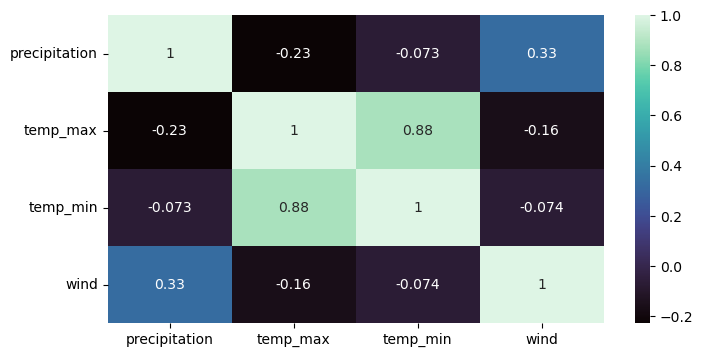

In [107]:
cor=df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap='mako')
plt.show()

In [108]:
df = df.sample(frac = 1, random_state=9) #shuffling data
target = df['weather'].copy() # target column separated
df = df.drop(['weather'], axis=1) #deleting target column from data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2,  random_state=7)

In [109]:
df

,precipitation,temp_max,temp_min,wind
255,0.0,22.2,10.0,5.6
370,3.0,6.7,4.4,3.1
59,0.8,5.0,1.1,7.0
955,21.6,23.3,15.0,2.7
1436,27.4,11.1,8.3,3.4
...,...,...,...,...
56,1.3,5.0,-1.1,3.4
501,0.0,21.7,12.2,2.7
638,18.5,13.9,10.0,6.3
348,7.9,6.1,1.1,1.7


In [110]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(X_train, y_train)
gini_predict = clf_gini.predict(X_test)

In [111]:
print(classification_report(y_test, gini_predict, zero_division=1))

              precision    recall  f1-score   support

     drizzle       0.14      0.07      0.09        15
         fog       0.28      0.33      0.30        21
        rain       0.92      0.91      0.92       132
        snow       0.33      0.75      0.46         4
         sun       0.76      0.77      0.77       121

    accuracy                           0.76       293
   macro avg       0.49      0.57      0.51       293
weighted avg       0.76      0.76      0.76       293



In [114]:
extremely_rts = ExtraTreesClassifier(n_estimators=50, criterion='gini',
                                     max_depth=50,
                                     min_samples_split=2)
extremely_rts = extremely_rts.fit(X_train, np.ravel(y_train)) #training
extreme_predict = extremely_rts.predict(X_test) 

In [115]:
print(classification_report(y_test, extreme_predict, zero_division=1))

              precision    recall  f1-score   support

     drizzle       0.25      0.07      0.11        15
         fog       0.22      0.10      0.13        21
        rain       0.97      0.95      0.96       132
        snow       0.67      1.00      0.80         4
         sun       0.76      0.91      0.83       121

    accuracy                           0.83       293
   macro avg       0.57      0.60      0.56       293
weighted avg       0.79      0.83      0.80       293



In [116]:
clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=None),
    n_estimators=100)
booster = clf.fit(X_train, np.ravel(y_train))
booster_predict = booster.predict(X_test)

In [117]:
print(classification_report(y_test, booster_predict, zero_division=1))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.25      0.10      0.14        21
        rain       0.96      0.92      0.94       132
        snow       0.50      0.75      0.60         4
         sun       0.75      0.91      0.82       121

    accuracy                           0.81       293
   macro avg       0.49      0.53      0.50       293
weighted avg       0.77      0.81      0.78       293



In [118]:
index= 1
X = X_test[index-1 : index]
position = np.where(extremely_rts.predict_proba(X)[0] == max(extremely_rts.predict_proba(X)[0]))
print(extremely_rts.predict_proba(X)[0])
extremely_rts. classes_

[0. 0. 0. 0. 1.]


array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [119]:
print(extremely_rts. classes_[position])
extremely_rts.predict_proba(X)[0][position]

['sun']


array([1.])

In [120]:
y_test.head(1)

1000    fog
Name: weather, dtype: object

In [121]:
index= 2
X = X_test[index-1 : index]
position = np.where(extremely_rts.predict_proba(X)[0] == max(extremely_rts.predict_proba(X)[0]))
print(extremely_rts.predict_proba(X)[0])

[0.08 0.02 0.32 0.   0.58]


In [122]:
print(extremely_rts. classes_[position])
extremely_rts.predict_proba(X)[0][position]

['sun']


array([0.58])

In [123]:
y_test[index-1 : index]

789    sun
Name: weather, dtype: object

In [124]:
index= 3
X = X_test[index-1 : index]
position = np.where(extremely_rts.predict_proba(X)[0] == max(extremely_rts.predict_proba(X)[0]))
print(extremely_rts.predict_proba(X)[0])

[0. 0. 1. 0. 0.]


In [125]:
print(extremely_rts. classes_[position])
extremely_rts.predict_proba(X)[0][position]

['rain']


array([1.])

In [126]:
y_test[index-1 : index]

317    rain
Name: weather, dtype: object

In [127]:
index= 4
X = X_test[index-1 : index]
position = np.where(extremely_rts.predict_proba(X)[0] == max(extremely_rts.predict_proba(X)[0]))
print(extremely_rts.predict_proba(X)[0])

[0.26 0.   0.   0.   0.74]


In [128]:
print(extremely_rts. classes_[position])
extremely_rts.predict_proba(X)[0][position]

['sun']


array([0.74])

In [129]:
y_test[index-1 : index]

378    sun
Name: weather, dtype: object